 ## Guía de Trabajos Prácticos 6

# **Librerías**

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import sys
import imutils
from ipywidgets import interact, IntSlider, FloatSlider, RadioButtons, Checkbox

print("Python version %s / OpenCV version %s " %(sys.version,cv.__version__))

Python version 3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0] / OpenCV version 4.8.0 


Activo mi entorno GDrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Ejercicio 1:** Detección de bordes

1. Implemente el detector de bordes de Prewitt en una función que retorne una imagen binaria con los bordes detectados.

In [3]:
def prewitt_edge_detection(image):
    prewitt_x = cv.filter2D(image, -1, np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]]))
    prewitt_y = cv.filter2D(image, -1, np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]]))
    prewitt_edges = cv.bitwise_or(prewitt_x, prewitt_y)
    _, binary_edges = cv.threshold(prewitt_edges, 50, 255, cv.THRESH_BINARY)
    return binary_edges

2. Estudie detalladamente los parámetros de la implementación de Sobel de OpenCV. Realicé un programa que aplique Sobel y le permita variar parámetros: el tipo de dato del resultado (CV_8U; CV_64F), derivadas en x e y (dx, dy), el tamaño de la máscara (ksize).

Cargue la imagen 'patron_bordes.jpg' y obtenga los siguientes resultados:

perfiles de intensidad que le permitan intuir los resultados posteriores
los bordes en dirección x
los bordes en dirección y
los bordes en todos los sentidos
los bordes en todos los sentidos variando 'ddepth'
los bordes en todos los sentidos variando el parámetro 'ksize' (3, 5 y 7)
los bordes utilizando la apertura de Scharr (ksize = FILTER_SCHARR (-1)))
Repita con una imagen real, analice los resultados y compárelos.

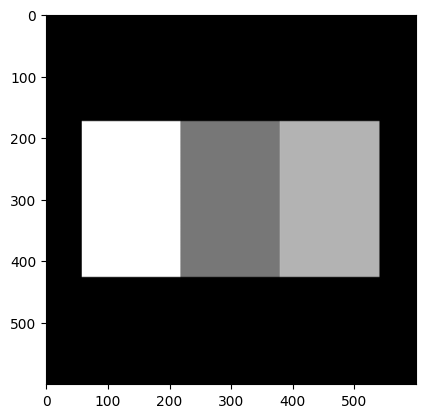

In [4]:
# Cargar la imagen de entrada
image = cv.imread('/content/drive/My Drive/PDI/patron_bordes.jpg', cv.IMREAD_GRAYSCALE)

plt.figure()
plt.imshow(image,cmap='gray')
plt.show()

In [5]:
# Función para normalizar y actualizar la imagen con los nuevos parámetros
def update_sobel(ddepth, dx, ksize):
    global image
    edges = cv.Sobel(image, ddepth, dx, 1-dx, ksize=ksize)
    plt.imshow(edges, cmap='gray', vmin=0, vmax=255)
    plt.title('Sobel Edges')
    plt.axis('off')
    plt.show()

# Crear controles interactivos
ddepth_widget = RadioButtons(options=[('CV_8U', cv.CV_8U), ('CV_64F', cv.CV_64F)], description='ddepth:')
dx_widget = RadioButtons(options=[('dx', 1), ('dy', 0)], description='Derivative:')
ksize_widget = IntSlider(min=-1, max=31, step=2, value=3, description='ksize:')

# Llamar a la función interact para generar la interfaz interactiva
interact(update_sobel, ddepth=ddepth_widget, dx=dx_widget, ksize=ksize_widget);

interactive(children=(RadioButtons(description='ddepth:', options=(('CV_8U', 0), ('CV_64F', 6)), value=0), Rad…

In [6]:
image = cv.imread('/content/drive/My Drive/PDI/cameraman.tif', cv.IMREAD_GRAYSCALE)

ddepth_widget = RadioButtons(options=[('CV_8U', cv.CV_8U), ('CV_64F', cv.CV_64F)], description='ddepth:')
dx_widget = RadioButtons(options=[('dx', 1), ('dy', 0)], description='Derivative:')
ksize_widget = IntSlider(min=-1, max=31, step=2, value=3, description='ksize:')

interact(update_sobel, ddepth=ddepth_widget, dx=dx_widget, ksize=ksize_widget);

interactive(children=(RadioButtons(description='ddepth:', options=(('CV_8U', 0), ('CV_64F', 6)), value=0), Rad…

3. Estudié la implementación del detector de bordes Laplaciano (2da. derivada) y analicé su uso variando la talla del filtro.

In [7]:
# Función para actualizar la imagen con los nuevos parámetros
def update_laplacian(ksize):
    global image
    edges_laplacian = cv.Laplacian(image, cv.CV_64F, ksize=ksize)
    plt.imshow(edges_laplacian, cmap='gray')
    plt.title('Bordes Laplacianos')
    plt.axis('off')
    plt.show()

# Crear control deslizante interactivo
ksize_slider = IntSlider(min=1, max=31, step=2, value=3, description='Tamaño del kernel')

# Llamar a la función interact para generar la interfaz interactiva
interact(update_laplacian, ksize=ksize_slider);

interactive(children=(IntSlider(value=3, description='Tamaño del kernel', max=31, min=1, step=2), Output()), _…

4. Implemente un programa que le permita evaluar el comportamiento del detector
de bordes de Canny, mientras varia sus parámetros de forma interactiva.
Evalúe los resultados al cambiar el parámetro L2gradient.

In [8]:
# Función para actualizar la imagen con los nuevos parámetros
def update_canny(threshold1, threshold2, l2gradient):
    global image
    edges = cv.Canny(image, threshold1, threshold2, L2gradient=bool(l2gradient))
    plt.imshow(edges, cmap='gray')
    plt.title('Bordes Canny')
    plt.axis('off')
    plt.show()

# Crear controles interactivos
threshold1_slider = IntSlider(min=0, max=255, value=50, description='Threshold 1:')
threshold2_slider = IntSlider(min=0, max=255, value=150, description='Threshold 2:')
l2gradient_checkbox = Checkbox(value=False, description='L2gradient')

# Llamar a la función interact para generar la interfaz interactiva
interact(update_canny, threshold1=threshold1_slider, threshold2=threshold2_slider, l2gradient=l2gradient_checkbox);

interactive(children=(IntSlider(value=50, description='Threshold 1:', max=255), IntSlider(value=150, descripti…

5. Cargue la imagen 'mosquito.jpg' y genere versiones con ruido impulsivo unimodal (variando el gris en que aparece) y con ruido gaussiano (µ = 0) para distintos valores de desviación estándar.
Aplique los distintos detectores de bordes a cada caso y compare los desempeños.

In [9]:
def add_impulse_noise(image, prob, intensity):
    noisy_image = np.copy(image)
    rows, cols = noisy_image.shape
    num_pixels = int(prob * rows * cols)
    coordinates = np.random.randint(0, rows, num_pixels), np.random.randint(0, cols, num_pixels)
    noisy_image[coordinates] = intensity
    return noisy_image

def add_gaussian_noise(image, mean, stddev):
    noisy_image = np.copy(image)
    rows, cols = noisy_image.shape
    noise = np.random.normal(mean, stddev, (rows, cols)).astype(np.uint8)
    noisy_image = cv.add(image, noise)
    return noisy_image

In [10]:
image = cv.imread('/content/drive/My Drive/PDI/mosquito.jpg', cv.IMREAD_GRAYSCALE)

In [11]:
# Función para normalizar y actualizar la imagen con los nuevos parámetros
def update_sobel(bool_impulse, intens, bool_gauss, stdv, ddepth, dx, ksize):
    global image
    if bool_impulse:
      image2 = add_impulse_noise(image, prob = 0.05, intensity = intens)
    else:
      image2 = image.copy()
    if bool_gauss:
      image2 = add_gaussian_noise(image2, mean = 0, stddev = stdv)
    edges = cv.Sobel(image2, ddepth, dx, 1-dx, ksize=ksize)
    plt.imshow(edges, cmap='gray', vmin=0, vmax=255)
    plt.title('Sobel Edges')
    plt.axis('off')
    plt.show()

# Crear controles interactivos
ruido_impulsivo_checkbox = Checkbox(value=False, description='Ruido impulsivo')
intens_slider = IntSlider(min=0, max=255, value=50, description='Intensidad ruido impulsivo:')
ruido_gaussiano_checkbox = Checkbox(value=False, description='Ruido gaussiano')
stdv_slider = IntSlider(min=0, max=255, value=50, description='Standard deviation ruido gaussiano:')
ddepth_widget = RadioButtons(options=[('CV_8U', cv.CV_8U), ('CV_64F', cv.CV_64F)], description='ddepth:')
dx_widget = RadioButtons(options=[('dx', 1), ('dy', 0)], description='Derivative:')
ksize_widget = IntSlider(min=-1, max=31, step=2, value=3, description='ksize:')

# Llamar a la función interact para generar la interfaz interactiva
interact(update_sobel, bool_impulse=ruido_impulsivo_checkbox, intens=intens_slider, bool_gauss=ruido_gaussiano_checkbox, stdv=stdv_slider, ddepth=ddepth_widget, dx=dx_widget, ksize=ksize_widget);

interactive(children=(Checkbox(value=False, description='Ruido impulsivo'), IntSlider(value=50, description='I…

> *   **¿En qué zonas (debido a qué) funciona mejor y en cuáles no?:**
*   **¿Qué sucede con el ruido?:**
*   **¿Con qué tipo de imágenes sacaría mejor provecho de los métodos?:**
*   **¿Qué tipo de preprocesamientos, de los que ya conoce, se le ocurren que serían útiles?:**

In [12]:
# Función para actualizar la imagen con los nuevos parámetros
def update_laplacian_noise(bool_impulse, intens, bool_gauss, stdv, ksize):
    global image
    if bool_impulse:
      image2 = add_impulse_noise(image, prob = 0.05, intensity = intens)
    else:
      image2 = image.copy()
    if bool_gauss:
      image2 = add_gaussian_noise(image2, mean = 0, stddev = stdv)
    edges_laplacian = cv.Laplacian(image2, cv.CV_64F, ksize=ksize)
    plt.imshow(edges_laplacian, cmap='gray')
    plt.title('Bordes Laplacianos')
    plt.axis('off')
    plt.show()

# Crear controles interactivos
ruido_impulsivo_checkbox = Checkbox(value=False, description='Ruido impulsivo')
intens_slider = IntSlider(min=0, max=255, value=50, description='Intensidad ruido impulsivo:')
ruido_gaussiano_checkbox = Checkbox(value=False, description='Ruido gaussiano')
stdv_slider = IntSlider(min=0, max=255, value=50, description='Standard deviation ruido gaussiano:')
ksize_slider = IntSlider(min=1, max=31, step=2, value=3, description='Tamaño del kernel')

# Llamar a la función interact para generar la interfaz interactiva
interact(update_laplacian_noise, bool_impulse=ruido_impulsivo_checkbox, intens=intens_slider, bool_gauss=ruido_gaussiano_checkbox, stdv=stdv_slider, ksize=ksize_slider);


interactive(children=(Checkbox(value=False, description='Ruido impulsivo'), IntSlider(value=50, description='I…

> *   **¿En qué zonas (debido a qué) funciona mejor y en cuáles no?:**
*   **¿Qué sucede con el ruido?:**
*   **¿Con qué tipo de imágenes sacaría mejor provecho de los métodos?:**
*   **¿Qué tipo de preprocesamientos, de los que ya conoce, se le ocurren que serían útiles?:**

In [13]:
# Función para actualizar la imagen con los nuevos parámetros
def update_canny_noise(bool_impulse, intens, bool_gauss, stdv, threshold1, threshold2, l2gradient):
    global image
    if bool_impulse:
      image2 = add_impulse_noise(image, prob = 0.05, intensity = intens)
    else:
      image2 = image.copy()
    if bool_gauss:
      image2 = add_gaussian_noise(image2, mean = 0, stddev = stdv)
    edges = cv.Canny(image2, threshold1, threshold2, L2gradient=bool(l2gradient))
    plt.imshow(edges, cmap='gray')
    plt.title('Bordes Canny')
    plt.axis('off')
    plt.show()

# Crear controles interactivos
ruido_impulsivo_checkbox = Checkbox(value=False, description='Ruido impulsivo')
intens_slider = IntSlider(min=0, max=255, value=50, description='Intensidad ruido impulsivo:')
ruido_gaussiano_checkbox = Checkbox(value=False, description='Ruido gaussiano')
stdv_slider = IntSlider(min=0, max=255, value=50, description='Standard deviation ruido gaussiano:')
threshold1_slider = IntSlider(min=0, max=255, value=50, description='Threshold 1:')
threshold2_slider = IntSlider(min=0, max=255, value=150, description='Threshold 2:')
l2gradient_checkbox = Checkbox(value=False, description='L2gradient')

# Llamar a la función interact para generar la interfaz interactiva
interact(update_canny_noise, bool_impulse=ruido_impulsivo_checkbox, intens=intens_slider, bool_gauss=ruido_gaussiano_checkbox, stdv=stdv_slider, threshold1=threshold1_slider, threshold2=threshold2_slider, l2gradient=l2gradient_checkbox);

interactive(children=(Checkbox(value=False, description='Ruido impulsivo'), IntSlider(value=50, description='I…

> *   **¿En qué zonas (debido a qué) funciona mejor y en cuáles no?:**
*   **¿Qué sucede con el ruido?:**
*   **¿Con qué tipo de imágenes sacaría mejor provecho de los métodos?:**
*   **¿Qué tipo de preprocesamientos, de los que ya conoce, se le ocurren que serían útiles?:**

## **Ejercicio 2:** Transformada de Hough (TH)



> *  **¿Qué tipo de imágenes son apropiadas para utilizar con TH?** La transformada de Hough (TH) es especialmente útil para detectar formas geométricas, como líneas, círculos o elipses, en imágenes binarias. Por lo tanto, las imágenes apropiadas para utilizar con TH son aquellas en las que se desea detectar estas formas geométricas.
*   **¿Qué preprocesos serían útiles?** Algunos preprocesos útiles antes de aplicar TH podrían incluir la binarización de la imagen, para convertirla en una imagen binaria donde los objetos de interés son blancos sobre un fondo negro o viceversa, eliminación de ruido.
*   **¿Qué se obtiene (en el espacio transformado) al aplicar TH a un punto?** Al aplicar TH a un punto en la imagen, se obtiene una curva o conjunto de curvas en el espacio transformado que representa todas las posibles líneas (o círculos, elipses, etc., dependiendo de la transformada de Hough utilizada) que podrían pasar por ese punto en la imagen original.
*   **¿Qué particularidad presentan (en el espacio transformado) los puntos colineales?** Una particularidad interesante en el espacio transformado es que los puntos colineales en la imagen original se convierten en curvas que se intersectan en el espacio transformado, lo que facilita la detección de líneas rectas.
*   **¿Qué espera y qué no, como resultado del proceso de la TH?** Esperaríamos obtener como resultado del proceso de TH un conjunto de parámetros que describen las formas geométricas encontradas en la imagen original, como la ecuación de una línea, un círculo o una elipse. Lo que no deberíamos esperar es una representación directa de los objetos detectados en la imagen original, ya que TH proporciona información sobre la geometría de estos objetos, pero no su ubicación precisa en la imagen. Por lo tanto, a menudo se necesita un paso adicional para identificar y ubicar los objetos detectados en la imagen original.




1. Estudie los parámetros de la función cv.HoughLines, y los formatos en los que
devuelve el resultado ([ρ, θ] o [ρ, θ, votes]).
Implemente un algoritmo que haga uso de esta función, debe permitir ajustar
el rango de los ángulos en la búsqueda de puntos colineales y el umbral para el
acumulador. Consejo: use trackbars.

In [354]:
image2 = cv.imread('/content/drive/My Drive/PDI/letras1.tif', cv.IMREAD_GRAYSCALE)
image2_canny = cv.Canny(image2, 50, 200, None)  #  en documentación: "Input image should be a binary image, so apply threshold or use canny edge detection before applying hough transform"

In [355]:
def updateHough(set_threshold, set_mintheta, set_maxtheta):
  imageHough = cv.cvtColor(image2_canny, cv.COLOR_GRAY2BGR)
  lines = cv.HoughLines(image2_canny, rho = 1, theta = np.pi/180, threshold = set_threshold, min_theta = set_mintheta, max_theta = set_maxtheta)

  if lines is not None:
      for line in lines:
          rho, theta = line[0]
          cos_theta, sin_theta = np.cos(theta), np.sin(theta)
          x0, y0 = rho * cos_theta, rho * sin_theta
          x1, y1 = int(x0 + 1000 * (-sin_theta)), int(y0 + 1000 * cos_theta)
          x2, y2 = int(x0 - 1000 * (-sin_theta)), int(y0 - 1000 * cos_theta)
          cv.line(imageHough, (x1, y1), (x2, y2), (255, 0, 172), 3, cv.LINE_AA)

  plt.imshow(imageHough)
  plt.title(f'threshold = {set_threshold}, min_theta = {set_mintheta}, max_theta = {set_maxtheta}')
  plt.axis('off')
  plt.show()

slider_threshold = IntSlider(min=0, max=200, value=53, description='Threshold:')
slider_mintheta = FloatSlider(min=0.0, max=3.14, step=0.01, value=0.0, description='Min Theta:')
slider_maxtheta = FloatSlider(min=0.0, max=3.14, step=0.01, value=2.66, description='Max Theta:')

# para que los sliders no tiren error (min tiene que ser menor a max sino rompe el HoughLines)
def check_theta(change):
    if slider_mintheta.value > slider_maxtheta.value:
        slider_maxtheta.value = slider_mintheta.value
slider_mintheta.observe(check_theta, 'value')
slider_maxtheta.observe(check_theta, 'value')

interact(updateHough, set_threshold = slider_threshold, set_mintheta = slider_mintheta, set_maxtheta = slider_maxtheta);

interactive(children=(IntSlider(value=53, description='Threshold:', max=200), FloatSlider(value=0.0, descripti…

Estudie la implementación de la TH probabilística cv.HoughLinesP, sus parámetros y el formato vectorial en el que devuelve los resultados. Implementé un algoritmo que hace uso de esta función, debe permitir ajustar los parámetros (minLineLength, maxLineGap) y el umbral para el acumulador. Utilicé ambas implementaciones con las imágenes 'letras1.tif', 'letras2.tif', 'snowman.png' y 'building.jpg'. Expliqué sus diferencias, ventajas y desventajas. ¿Cuándo utilizaría uno y cuándo el otro?

In [16]:
# cv.HoughLinesP(	image, rho, theta, threshold[, lines[, minLineLength[, maxLineGap]]]	)

def updateHoughP(set_threshold, set_minLength, set_maxGap):
  imageHoughP = cv.cvtColor(image2_canny, cv.COLOR_GRAY2BGR)
  lines = cv.HoughLinesP(image2_canny, rho = 1, theta = np.pi/180, threshold = set_threshold, minLineLength = set_minLength, maxLineGap = set_maxGap)

  if lines is not None:
      for line in lines:
          l = line[0]
          cv.line(imageHoughP, (l[0], l[1]), (l[2], l[3]), (255,0,127,0), 3, cv.LINE_AA)
  plt.imshow(imageHoughP)
  plt.title(f'threshold = {set_threshold}, minLineLength = {set_minLength}, maxLineGap = {set_maxGap}')
  plt.axis('off')
  plt.show()

slider_threshold = IntSlider(min=0, max=200, value=35, description='Threshold:')
slider_minLength = IntSlider(min=0, max=200, value=32, description='Min Line Length:')
slider_maxGap = IntSlider(min=0, max=200, value=19, description='Max Line Gap:')

interact(updateHoughP, set_threshold = slider_threshold, set_minLength = slider_minLength, set_maxGap = slider_maxGap);

interactive(children=(IntSlider(value=35, description='Threshold:', max=200), IntSlider(value=32, description=…



> 🔍 **HoughLines** funciona mediante la transformada de Hough estándar, que mapea puntos en una imagen a líneas en un espacio de parámetros (ρ, θ). La implementación estándar no devuelve segmentos de línea, sino solo las líneas completas que pasan por todos los puntos votados en la imagen.
Por lo tanto, no proporciona información sobre segmentos de líneas parciales o discontinuas.

> HoughLines tiene dos parámetros opcionales (minTheta y maxTheta) que establecen el ángulo mínimo y máximo en radianes (van de 0 a pi) que se considera al buscar líneas en la imágen.

> Es mejor utilizarlo cuando queremos líneas de un ángulo específico o cuando queremos la linea entera en vez de segmentada.

> 🔍 **HoughLinesP** es más eficiente computacionalmente y devuelve segmentos de líneas (líneas parciales) en lugar de líneas completas. Esto significa que es capaz de detectar segmentos de líneas parciales y discontinuas en la imagen.

> HoughLinesP toma dos parámetros adicionales (minLineLength y maxLineGap) que permiten controlar la longitud mínima y la brecha máxima entre segmentos de línea para que se consideren como una sola línea.

> Es mejor utilizarlo cuando queremos detectar lineas parciales ya segmentadas. Sin embargo, no puede controlar los ángulos de las líneas como con HoughLines.

## **Ejercicio 3:** Segmentación mediante crecimiento de regiones

1. Estudie, instale y ponga en funcionamiento alguna función de crecimiento
de regiones. Por ejemplo, SimpleITK (https://insightsoftwareconsortium.github.io/SimpleITK-Notebooks/Python_html/30_Segmentation_Region_Growing.html). Cargue imágenes médicas, del repositorio o de internet, y segmente algún área de interés utilizando el método de crecimiento de regiones. La semilla seleccionada por el usuario (puede hacerlo mediante un click o por
teclado).

In [17]:
!pip install SimpleITK

In [27]:
import SimpleITK as sitk

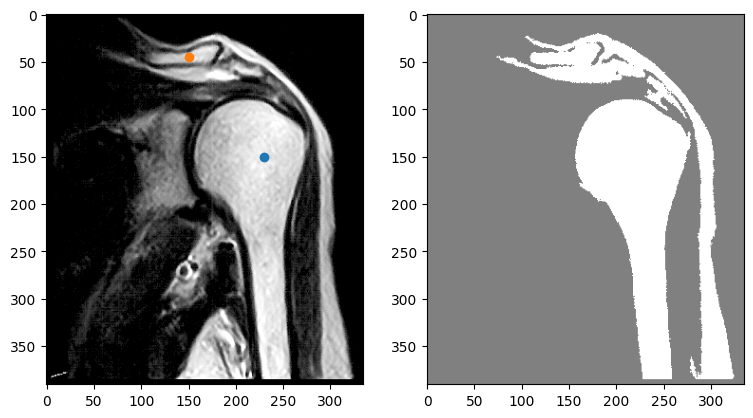

In [34]:
img_sitk = sitk.VectorIndexSelectionCast(sitk.ReadImage('/content/drive/My Drive/PDI/bone.tif'), 0)

LOWER = 80                         # umbral mínimo
UPPER = 255                        # umbral máximo
SEEDLIST = [(230,150),(150,45)]    # semillas (podría ser con click pero...)

seg = sitk.ConnectedThreshold(img_sitk, seedList=SEEDLIST, lower=LOWER, upper=UPPER)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(9,9))
ax[0].imshow(sitk.GetArrayFromImage(img_sitk),cmap="gray")
for seed in SEEDLIST: # grafico las semillas para ver donde las tomé
  ax[0].scatter(seed[0],seed[1])
ax[1].imshow(sitk.GetArrayFromImage(seg), cmap='gray', alpha=0.5)
plt.show()

In [4]:
def segmentacion_rgb(img,roi,R):
    # obtenemos información de la roi para generar máscara
    BGR_roi = cv.split(roi)
    maxB = np.argmax(np.histogram(BGR_roi[0],np.arange(256))[0])  # obtenemos valor más frecuente de rojo
    maxG = np.argmax(np.histogram(BGR_roi[1],np.arange(256))[0])  # valor más frecuente de verde
    maxR = np.argmax(np.histogram(BGR_roi[2],np.arange(256))[0])  # valor más frecuente de azul

    # generar máscara:
    H,W,_ = img.shape
    maskBGR = np.zeros((H,W),np.uint8)

    for i in range(H):  # recorremos píxel a píxel
        for j in range(W):
            if ((maxB - img[i][j][0])**2 + (maxG - img[i][j][1])**2 + (maxR - img[i][j][2])**2) <= R**2: # si los valores de rojo, verde y azul del píxel i,j
                                                                                                         # tienen una distancia euclidea menor a R con los
                                                                                                         # valores más frecuentes de la ROI, me interesa.
                maskBGR[i][j]=255 # le pongo valor 255 a la máscara en ese píxel, si no entra acá ese píxel queda en 0 y va a descartarlo cunado aplique la máscara.
    return maskBGR

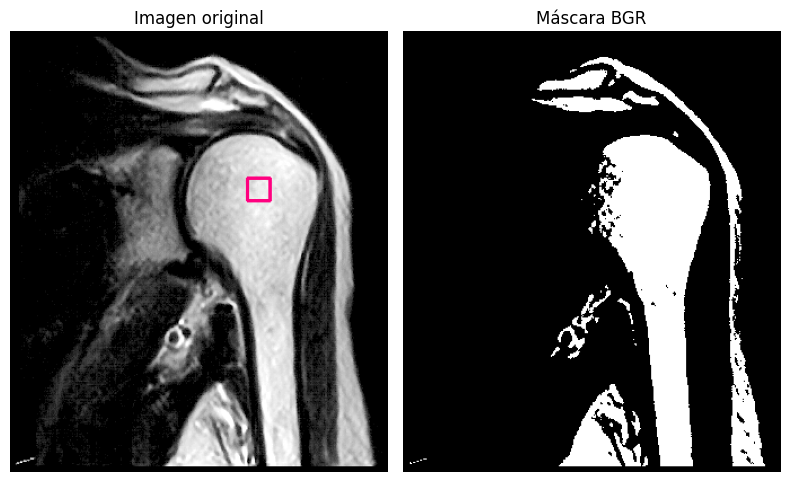

In [72]:
img = cv.imread('/content/drive/My Drive/PDI/bone.tif')

x = [210,230]
y = [130,150]
roi = img[y[0]:y[1],x[0]:x[1]]
maskBGR = segmentacion_rgb(img,roi,100)

fig,ax = plt.subplots(1,2,figsize=(8,8))

img_con_roi = img.copy()
cv.rectangle(img_con_roi, (x[0], y[0]), (x[1], y[1]), (255, 0, 127, 255), 2)
ax[0].imshow(img_con_roi)
ax[0].axis('off')
ax[0].set_title("Imagen original")

ax[1].imshow(maskBGR,cmap='gray')
ax[1].axis('off')
ax[1].set_title("Máscara BGR")

plt.tight_layout()
plt.show()

El método por segmentación RGB no permite controlar bien las zonas, sólo umbraliza según una distancia al color de interés. Además, como hay como un degradé dentro de la zona de interés, no logra agarrar todo sin empezar a agarrar cosas que no van.
Esto no pasa con la segmentación por crecimiento de regiones porque deja de tomar la zona cuando cambia por mucho, entonces logra agarrar toda la zona y de paso agarra de a una. Si pongo varias seed toma todas las partes que quiero, cosa que con segmentación RGB no puedo hacer porque agarra todo con el umbralizado.

## **Ejercicio 4:** Segmentación en color y etiquetado

El objetivo del ejercicio es poder identificar las rosas presentes en la imagen ’rosas.jpg’ para obtener información al respecto.
1. Utilice alguno de los métodos de segmentación color vistos previamente, y obtenga una máscara binaria con las rosas segmentadas.


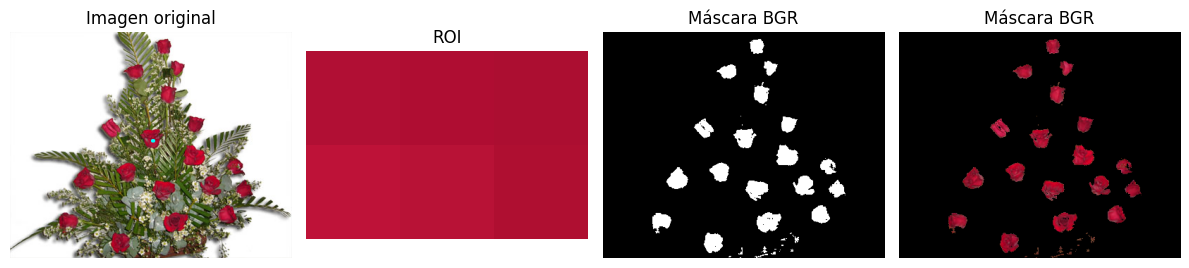

In [107]:
rosas = cv.imread('/content/drive/My Drive/PDI/rosas.jpg')

x = [201,204]
y = [153,155]
roi = rosas[y[0]:y[1],x[0]:x[1]]
maskBGR = segmentacion_rgb(rosas,roi,90)
rosas_maskBGR = cv.bitwise_and(rosas,rosas,mask=maskBGR)

fig,ax = plt.subplots(1,4,figsize=(12,12))

rosas_con_roi = rosas.copy()
cv.rectangle(rosas_con_roi, (x[0], y[0]), (x[1], y[1]), (255, 255, 0), 2)
ax[0].imshow(rosas_con_roi[:,:,[2,1,0]])
ax[0].axis('off')
ax[0].set_title("Imagen original")

ax[1].imshow(roi[:,:,[2,1,0]])
ax[1].axis('off')
ax[1].set_title("ROI")

ax[2].imshow(maskBGR,cmap='gray')
ax[2].axis('off')
ax[2].set_title("Máscara BGR")

ax[3].imshow(rosas_maskBGR[:,:,[2,1,0]])
ax[3].axis('off')
ax[3].set_title("Máscara BGR")

plt.tight_layout()
plt.show()

 2. Mejore la máscara, descartando información errónea (ruido) con el método que considere apropiado.

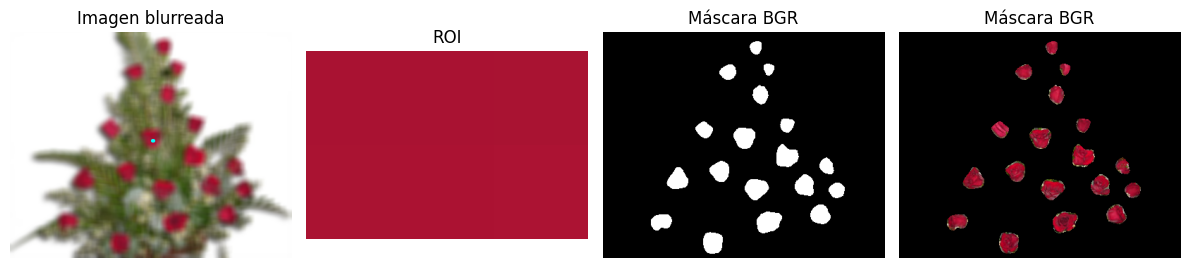

In [109]:
rosas_blur = cv.boxFilter(rosas,-1,(11,11))
roi_blur = rosas_blur[y[0]:y[1],x[0]:x[1]]
blur_maskBGR = segmentacion_rgb(rosas_blur,roi,90)
rosas_blur_maskBGR = cv.bitwise_and(rosas,rosas,mask=blur_maskBGR)

fig,ax = plt.subplots(1,4,figsize=(12,12))

rosas_blur_con_roi = rosas_blur.copy()
cv.rectangle(rosas_blur_con_roi, (x[0], y[0]), (x[1], y[1]), (255, 255, 0), 2)

ax[0].imshow(rosas_blur_con_roi[:,:,[2,1,0]])
ax[0].axis('off')
ax[0].set_title("Imagen blurreada")

ax[1].imshow(roi_blur[:,:,[2,1,0]])
ax[1].axis('off')
ax[1].set_title("ROI")

ax[2].imshow(blur_maskBGR,cmap='gray')
ax[2].axis('off')
ax[2].set_title("Máscara BGR")

ax[3].imshow(rosas_blur_maskBGR[:,:,[2,1,0]])
ax[3].axis('off')
ax[3].set_title("Máscara BGR")

plt.tight_layout()
plt.show()

3. Identifique las diferentes regiones por el método de etiquetado de componentes conectadas.

Número de rosas: 19


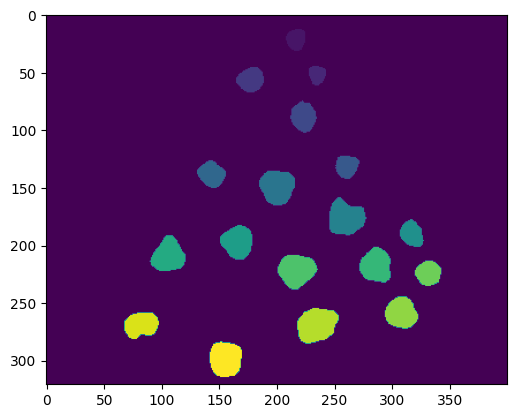

In [115]:
num_labels,labels = cv.connectedComponents(blur_maskBGR)

print('Número de rosas:', num_labels)
plt.imshow(labels)
plt.show()

4. ¿Podría obtener el mismo resultado utilizando el algoritmo de crecimiento de
regiones? ¿Cómo lo aplicaría?
Modifique su implementación previa, pruébela y saque conclusiones.


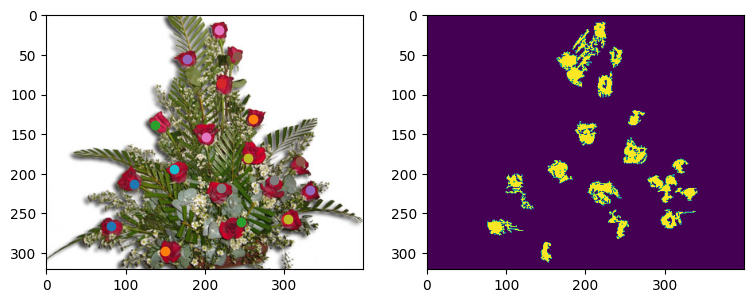

In [201]:
# Leer la imagen RGB
rosas_sitk = sitk.ReadImage('/content/drive/My Drive/PDI/rosas.jpg')

rosas_blurred = sitk.SmoothingRecursiveGaussian(rosas_sitk, sigma=0.01)

# Convertir la imagen a escala de grises
rosas_grayscale = sitk.VectorMagnitude(rosas_blurred)

# Definir los parámetros de segmentación
LOWER = 150          # umbral mínimo
UPPER = 220          # umbral máximo
SEEDLIST = [(82,266),(150,298),(246,261),(302,257),(333,220),(320,184),(201, 153),(287,208),(305,257),(161,194),(111,213),(260,131),(137,139),(220,85),(177,55), (240,52),(218,18),(220,218),(254,180)]    # semillas (podría ser con click pero...)

# Aplicar la segmentación
seg_rosas = sitk.ConnectedThreshold(rosas_grayscale, seedList=SEEDLIST, lower=LOWER, upper=UPPER)

# Visualizar las imágenes
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(9, 9))
ax[0].imshow(sitk.GetArrayFromImage(rosas_sitk))
for seed in SEEDLIST: # grafico las semillas para ver donde las tomé
    ax[0].scatter(seed[0], seed[1])
ax[1].imshow(sitk.GetArrayFromImage(seg_rosas))
plt.show()

> Tenés que elegir una seed por rosa y de paso es complicado porque el verde y el rojo tienen valores parecidos cuando los convierto a grises (hace magnitud de vector y rojo es [255,0,0] y verde es [0,0,255]). Además, si agarrás la imagen original sin umbralizarla con algún método, cada rosa tiene distintos valorcitos de rojo así que depende mucho del punto que agarres.

4. Cuente automáticamente la cantidad de rosas presente en la imagen original.
Sobre la imagen original, dibuje un círculo en el centro de cada rosa.


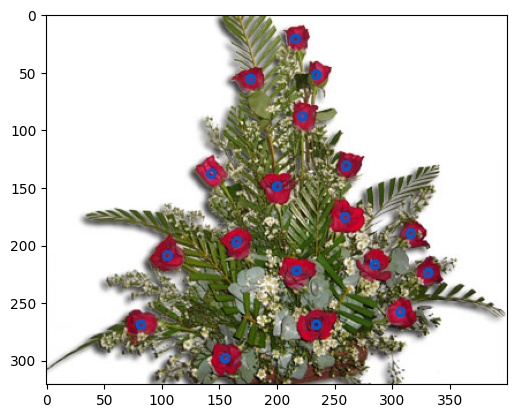

In [217]:
rosas_circulos = rosas.copy()

contours = cv.findContours(np.uint8(labels), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)[0]
for cnt in contours:
    M = cv.moments(cnt)
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])
    cv.circle(rosas_circulos,(cx,cy),3,(200,90,0),2)

plt.figure()
plt.imshow(rosas_circulos[:,:,[2,1,0]])
plt.show()

## **Ejercicio 5:** Aplicaciones

1. Realice un programa que le permita encontrar un objeto rectangular en una
imagen, usted elija la imagen real y el objeto: una mesa, un teclado, un celular.
Realice todos los procesamientos que considere necesarios.
Ayuda: se restringe el uso a imágenes donde los bordes del objeto estén paralelos a los bordes de la imagen. Utilice versiones rotadas de la imagen (90,180 y 270
grados) para comprobar la robustez del método.


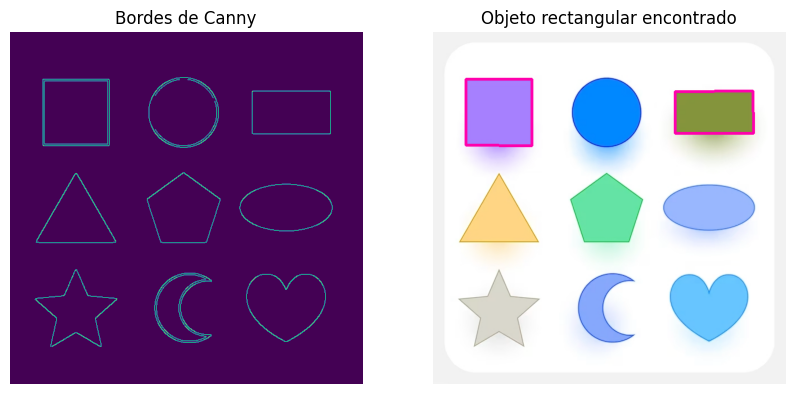

In [537]:
imagen = cv.imread('/content/drive/My Drive/PDI/formas.jpg')

imagen_gris = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
imagen_suavizada = cv.GaussianBlur(imagen_gris, (5, 5), 0)  # filtro gaussiano para mejor umbralizado (varía según img)
bordes = cv.Canny(imagen_suavizada, 60, 150)  # primero detectamos bordes con canny
contornos, _ = cv.findContours(bordes.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # después búsqueda de contornos

objetos_rectangulares = []
for contorno in contornos:
    perimetro = cv.arcLength(contorno, True)
    aproximacion_poligonal = cv.approxPolyDP(contorno, 0.02 * perimetro, True)
    if len(aproximacion_poligonal) == 4:  # si el contorno tiene 4 vértices, probablemente sea un rectángulo
        objetos_rectangulares.append(aproximacion_poligonal)

for rectangulo in objetos_rectangulares:
    cv.drawContours(imagen, [rectangulo], -1, (255, 0, 172), 3)

fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(bordes)
ax[0].set_title('Bordes de Canny')
ax[0].axis('off')
ax[1].imshow(imagen)
ax[1].set_title('Objeto rectangular encontrado')
ax[1].axis('off')
plt.show()

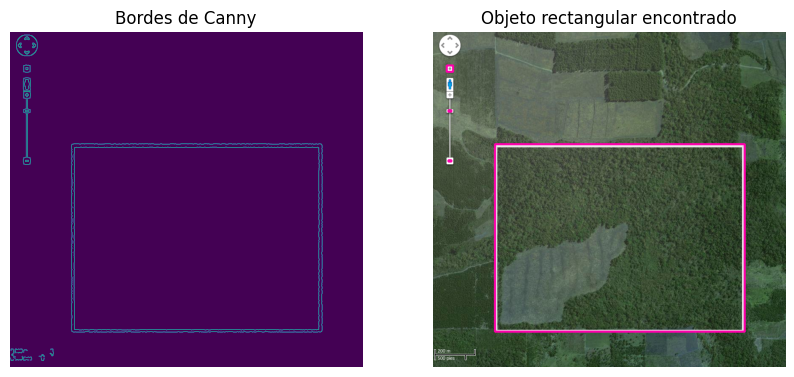

In [549]:
imagen = cv.imread('/content/drive/My Drive/PDI/Deforestacion.png')

imagen_gris = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
imagen_suavizada = cv.GaussianBlur(imagen_gris, (5, 5), 0)  # filtro gaussiano para mejor umbralizado (varía según img)
bordes = cv.Canny(imagen_suavizada, 200, 255)  # primero detectamos bordes con canny
contornos, _ = cv.findContours(bordes.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # después búsqueda de contornos

objetos_rectangulares = []
for contorno in contornos:
    perimetro = cv.arcLength(contorno, True)
    aproximacion_poligonal = cv.approxPolyDP(contorno, 0.02 * perimetro, True)
    if len(aproximacion_poligonal) == 4:  # si el contorno tiene 4 vértices, probablemente sea un rectángulo
        objetos_rectangulares.append(aproximacion_poligonal)

for rectangulo in objetos_rectangulares:
    cv.drawContours(imagen, [rectangulo], -1, (255, 0, 172), 3)

fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(bordes)
ax[0].set_title('Bordes de Canny')
ax[0].axis('off')
ax[1].imshow(imagen)
ax[1].set_title('Objeto rectangular encontrado')
ax[1].axis('off')
plt.show()

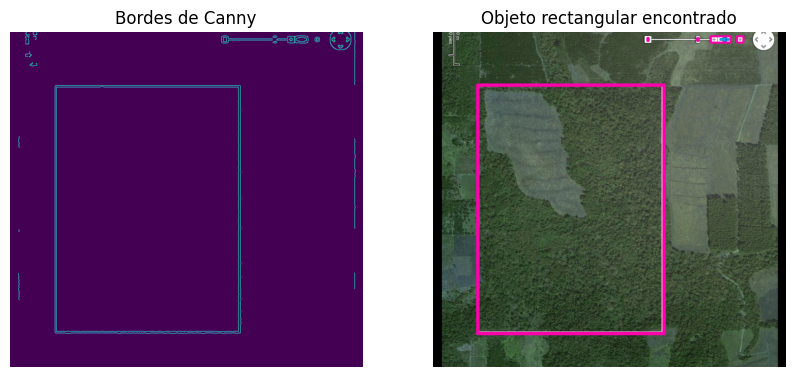

In [550]:
imagen = imutils.rotate(imagen,270)

imagen_gris = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
imagen_suavizada = cv.GaussianBlur(imagen_gris, (5, 5), 0)  # filtro gaussiano para mejor umbralizado (varía según img)
bordes = cv.Canny(imagen_suavizada, 200, 255)  # primero detectamos bordes con canny
contornos, _ = cv.findContours(bordes.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE) # después búsqueda de contornos

objetos_rectangulares = []
for contorno in contornos:
    perimetro = cv.arcLength(contorno, True)
    aproximacion_poligonal = cv.approxPolyDP(contorno, 0.02 * perimetro, True)
    if len(aproximacion_poligonal) == 4:  # si el contorno tiene 4 vértices, probablemente sea un rectángulo
        objetos_rectangulares.append(aproximacion_poligonal)

for rectangulo in objetos_rectangulares:
    cv.drawContours(imagen, [rectangulo], -1, (255, 0, 172), 3)

fig,ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(bordes)
ax[0].set_title('Bordes de Canny')
ax[0].axis('off')
ax[1].imshow(imagen)
ax[1].set_title('Objeto rectangular encontrado')
ax[1].axis('off')
plt.show()

> Lo encuentra para rotaciones de 90, 180 y 270 por igual. También se probó para ángulos que cambiaran la alineación del rectángulo con los límites de la imágen y logró encontrarlo (por ejemplo 75 grados o 25 grados).

2. Estudie la implementación de la TH para círculos con cv.HoughCircles(). Utilizando la imagen 'latas.png', realiza un programa que:
- Cuente e informe el número de latas.
- Informe el número de latas discriminando entre grandes y pequeñas.

  Realiza los preprocesamientos que creas necesarios y puedes probar la robustez de tu implementación rotando la imagen 180 grados.

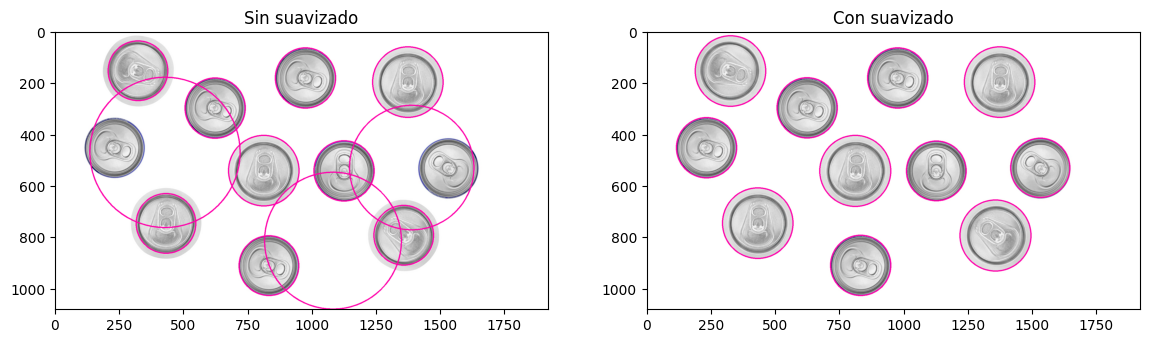

In [246]:
latas = cv.imread('/content/drive/My Drive/PDI/latas.png')
latas1 = latas.copy() # salida sin preprocesamiento
latas2 = latas.copy() # salida con procesamiento

latas_gray = cv.cvtColor(latas,cv.COLOR_BGR2GRAY)
latas_blur = cv.medianBlur(latas_gray,5)
circles_blur = cv.HoughCircles(latas_blur, cv.HOUGH_GRADIENT, 1, 250, minRadius=115)
circles = cv.HoughCircles(latas_gray, cv.HOUGH_GRADIENT, 1, 250, minRadius=115)

if circles is not None:
    circles = np.uint16(circles)
    for i in circles[0, :]:
        cv.circle(latas1, (i[0],i[1]), i[2], (255, 0, 170), 3)

if circles_blur is not None:
    circles_blur = np.uint16(circles_blur)
    for i in circles_blur[0, :]:
        cv.circle(latas2, (i[0],i[1]), i[2], (255, 0, 170), 3)

fig,ax = plt.subplots(1,2,figsize=(14,14))
ax[0].imshow(latas1,cmap='gray')
ax[0].set_title('Sin suavizado')
ax[1].imshow(latas2,cmap="gray")
ax[1].set_title('Con suavizado')
plt.show()

In [235]:
circles_blur = np.uint16(np.around(circles_blur))
for i in circles_blur[0, :]:
  print(i[2])

117
117
117
117
137
137
138
137
116
138
115


> Vemos que hay monedas chiquitas van de 115-117 y después hay radios de 137-138. Entonces para informar la cantidad de cada tipo determinamos un umbral de 125 para abajo para las monedas chiquitas y 125 para arriba las monedas grandes.

In [236]:
if circles_blur is not None:
    circles_blur = np.uint16(np.around(circles_blur))
    count_by_radius = {}

    for i in circles_blur[0, :]:
        radius = i[2]
        count_by_radius[radius] = count_by_radius.get(radius, 0) + 1

    count_radio_gt_125 = sum(count for radius, count in count_by_radius.items() if radius > 125)
    count_radio_ls_125 = sum(count for radius, count in count_by_radius.items() if radius < 125)

    print(f"La cantidad de elementos con radio mayor a 125 es: {count_radio_gt_125}")
    print(f"La cantidad de elementos con radio menor a 125 es: {count_radio_ls_125}")

La cantidad de elementos con radio mayor a 125 es: 5
La cantidad de elementos con radio menor a 125 es: 6


Y también se puede redondear cada moneda con un color distinto según su clasificación.

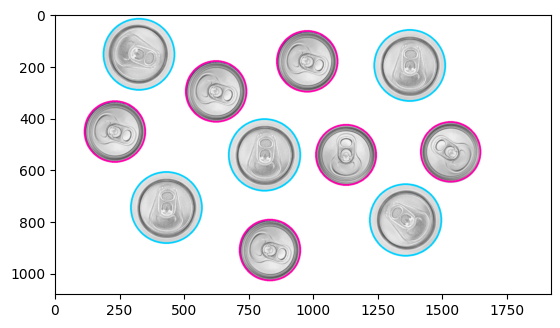

In [243]:
latas3 = latas.copy()
if circles_blur is not None:
    circles_blur = np.uint16(circles_blur)
    for i in circles_blur[0, :]:
      if i[2] > 125:  # monedas grandes
        cv.circle(latas3, (i[0],i[1]), i[2], (0, 208, 255), 5)
      else:           # monedas chicas
        cv.circle(latas3, (i[0],i[1]), i[2], (255, 0, 170), 5)

plt.figure()
plt.imshow(latas3,cmap="gray")
plt.show()

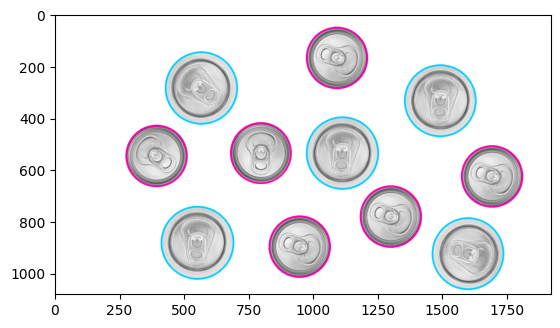

In [250]:
latas_rotated = imutils.rotate(latas,180)

latas_gray = cv.cvtColor(latas_rotated,cv.COLOR_BGR2GRAY)
latas_blur = cv.medianBlur(latas_gray,5)
circles_blur = cv.HoughCircles(latas_blur, cv.HOUGH_GRADIENT, 1, 250, minRadius=115)
circles = cv.HoughCircles(latas_gray, cv.HOUGH_GRADIENT, 1, 250, minRadius=115)

if circles_blur is not None:
    circles_blur = np.uint16(circles_blur)
    for i in circles_blur[0, :]:
      if i[2] > 125:  # monedas grandes
        cv.circle(latas_rotated, (i[0],i[1]), i[2], (0, 208, 255), 5)
      else:           # monedas chicas
        cv.circle(latas_rotated, (i[0],i[1]), i[2], (255, 0, 170), 5)

plt.figure()
plt.imshow(latas_rotated,cmap='gray')
plt.show()


3. Implemente un código para segmentar de forma automática la pista de aterrizaje principal en las imágenes de aeropuertos (corrientes_ruidogris.jpg e iguazú_ruidogris.jpg), las cuales poseen una combinación de ruido gaussiano e impulsivo. La salida del proceso debe ser la imagen restaurada con la pista principal coloreada (por ejemplo, con rectas rojas).

  Tenga en cuenta que el método debe ser útil para imágenes de otros aeropuertos, con características similares pero con variaciones en la localización, el largo de la pista, la inclinación de la pista, etc.

  Para probar la robustez de su código, se le sugiere que genere imágenes rotadas y/o desplazadas de las propuestas.

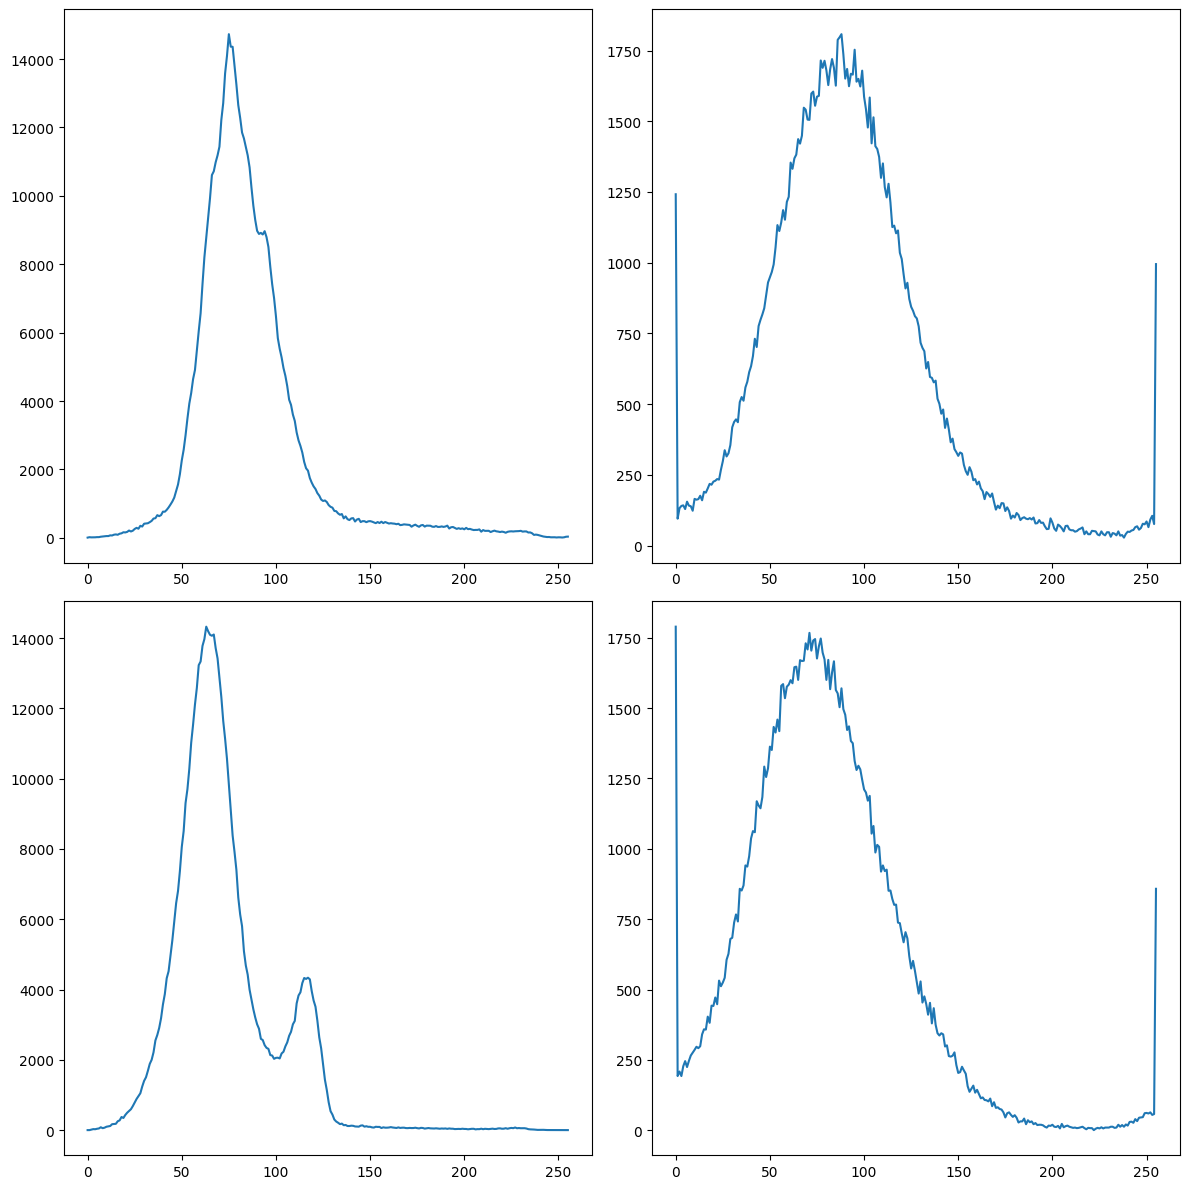

In [376]:
corrientes_ruido = cv.imread('/content/drive/My Drive/PDI/corrientes_ruidogris.jpg')
corrientes = cv.imread('/content/drive/My Drive/PDI/corrientes.jpg')
iguazu_ruido = cv.imread('/content/drive/My Drive/PDI/iguazu_ruidogris.jpg')
iguazu = cv.imread('/content/drive/My Drive/PDI/iguazu.jpg')

hist_corrientes = cv.calcHist([cv.cvtColor(corrientes, cv.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
hist_corrientes_ruido = cv.calcHist([cv.cvtColor(corrientes_ruido, cv.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
hist_iguazu = cv.calcHist([cv.cvtColor(iguazu, cv.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
hist_iguazu_ruido = cv.calcHist([cv.cvtColor(iguazu_ruido, cv.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])

fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(hist_corrientes)
ax[0,1].plot(hist_corrientes_ruido)
ax[1,0].plot(hist_iguazu)
ax[1,1].plot(hist_iguazu_ruido)
plt.tight_layout()
plt.show()

> Se utiliza el filtro de mediana para deshacerse del ruido impulsivo y un filtro gaussiano para el ruido del mismo nombre.

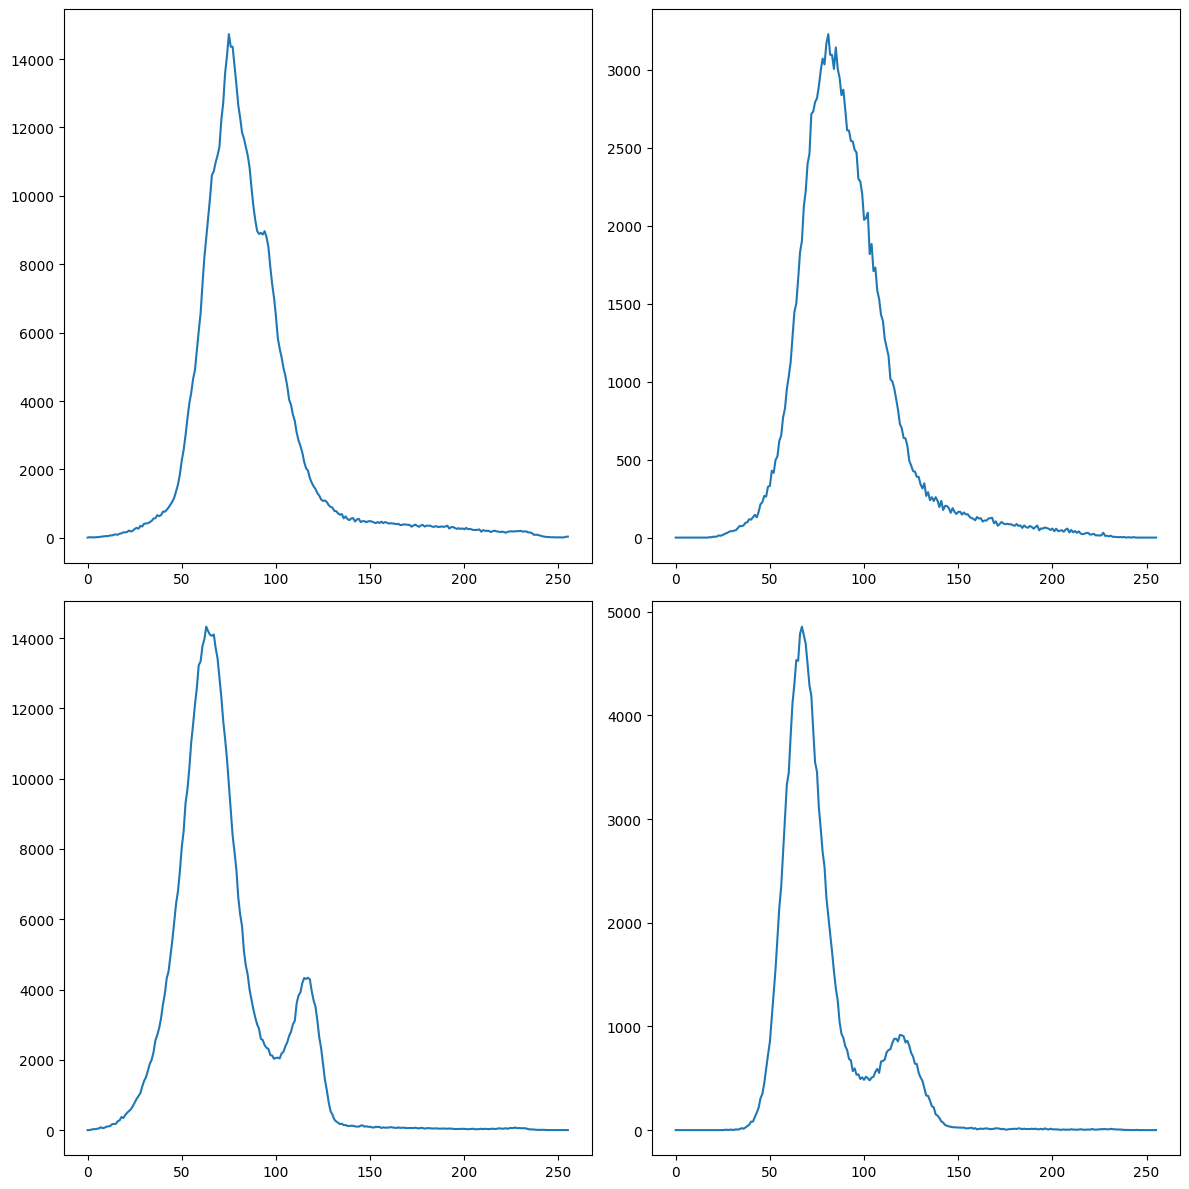

In [377]:
corrientes_filtrada = cv.medianBlur(corrientes_ruido, 3)
corrientes_filtrada = cv.GaussianBlur(corrientes_filtrada, (3, 3), 0)

iguazu_filtrada = cv.medianBlur(iguazu_ruido, 3)
iguazu_filtrada = cv.GaussianBlur(iguazu_filtrada, (3, 3), 0)

hist_corrientes_filtrada = cv.calcHist([cv.cvtColor(corrientes_filtrada, cv.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])
hist_iguazu_filtrada = cv.calcHist([cv.cvtColor(iguazu_filtrada, cv.COLOR_BGR2GRAY)], [0], None, [256], [0, 256])

fig, ax = plt.subplots(2,2,figsize=(12,12))
ax[0,0].plot(hist_corrientes)
ax[0,1].plot(hist_corrientes_filtrada)
ax[1,0].plot(hist_iguazu)
ax[1,1].plot(hist_iguazu_filtrada)
plt.tight_layout()
plt.show()

> Una vez filtradas las imagenes de sus ruidos, podemos avanzar con el procesamiento de bordes.

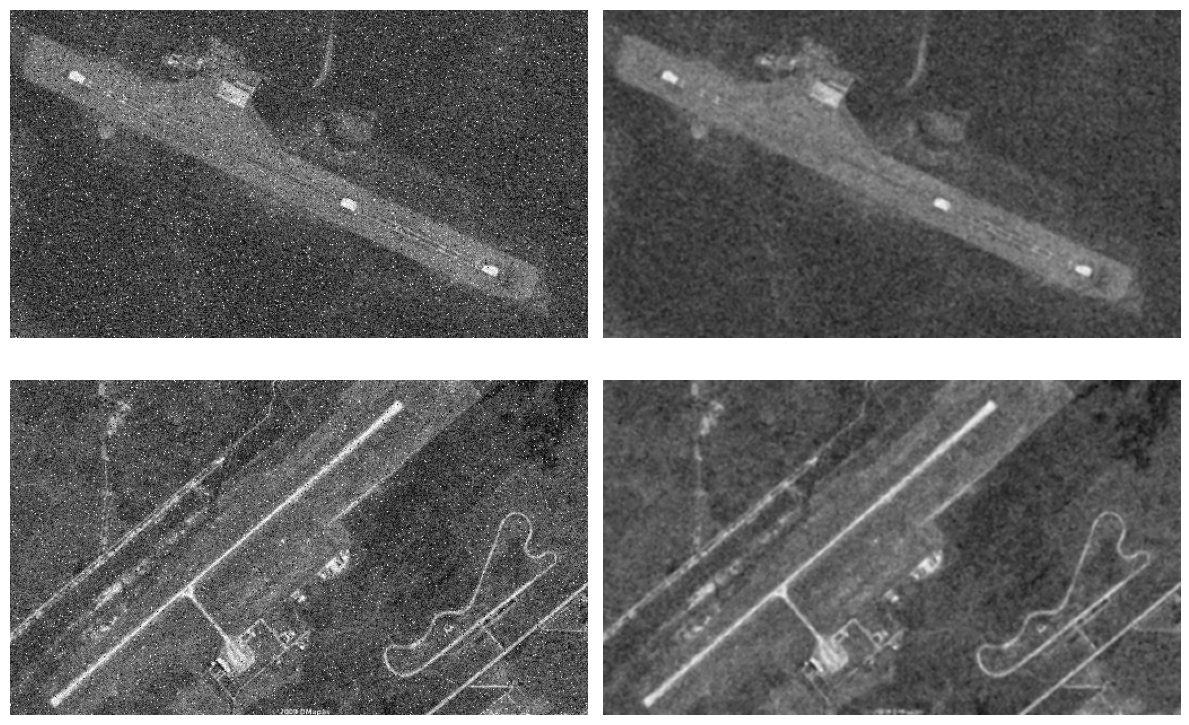

In [378]:
fig, ax = plt.subplots(2,2,figsize = (12,8))
ax[0,0].imshow(iguazu_ruido)
ax[0,0].axis('off')
ax[0,1].imshow(iguazu_filtrada)
ax[0,1].axis('off')
ax[1,0].imshow(corrientes_ruido)
ax[1,0].axis('off')
ax[1,1].imshow(corrientes_filtrada)
ax[1,1].axis('off')
plt.tight_layout()
plt.show()

> Se umbraliza previo a utilizar la Transformada de Hough.

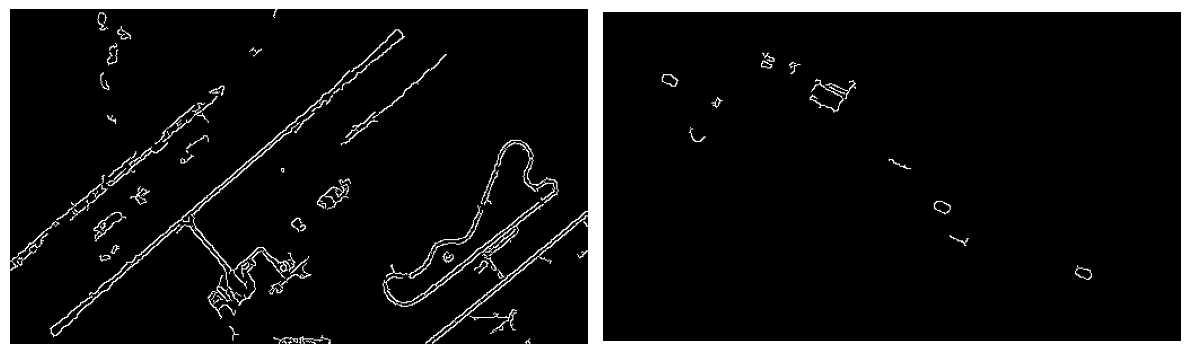

In [415]:
cannyCorrientes = cv.Canny(corrientes_filtrada,100,255)
cannyIguazu = cv.Canny(iguazu_filtrada,100,255)

fig, ax = plt.subplots(1,2,figsize = (12,12))
ax[0].imshow(cannyCorrientes,cmap='gray')
ax[0].axis('off')
ax[1].imshow(cannyIguazu,cmap='gray')
ax[1].axis('off')
plt.tight_layout()
plt.show()

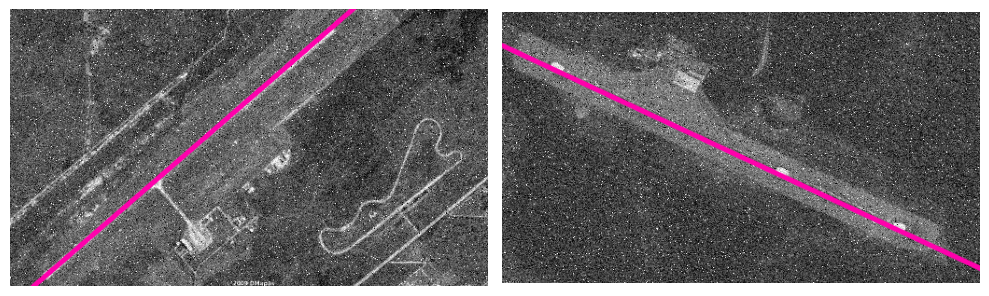

In [416]:
# AEROPUERTO DE CORRIENTES
corrientes_final = corrientes_ruido.copy()

i = 2
while True: # va subiendo el acumulador hasta que solo queda una linea decidida
    linesP_corrientes = cv.HoughLines(cannyCorrientes,1,np.pi/180,i)
    if len(linesP_corrientes) != 1: # si no hay una, sumo acumulador para seguir buscando
      i+=1
    else: # si hay solo una linea, corto y grafico esa
      break

if linesP_corrientes is not None:
    for line in linesP_corrientes:
        rho, theta = line[0]
        cos_theta, sin_theta = np.cos(theta), np.sin(theta)
        x0, y0 = rho * cos_theta, rho * sin_theta
        x1, y1 = int(x0 + 1000 * (-sin_theta)), int(y0 + 1000 * cos_theta)
        x2, y2 = int(x0 - 1000 * (-sin_theta)), int(y0 - 1000 * cos_theta)
        cv.line(corrientes_final, (x1, y1), (x2, y2), (255, 0, 172), 3, cv.LINE_AA)

# AEROPUERTO DE IGUAZU
iguazu_final = iguazu_ruido.copy()
i = 2
while True: # va subiendo el acumulador hasta que solo queda una linea decidida
    linesP_iguazu = cv.HoughLines(cannyIguazu,1,np.pi/180,i)
    if (len(linesP_iguazu) != 1): # si no hay una, sumo acumulador para seguir buscando
      i+=1
    else: # si hay solo una linea, corto y grafico esa
      break

if linesP_iguazu is not None:
    for line in linesP_iguazu:
        rho, theta = line[0]
        cos_theta, sin_theta = np.cos(theta), np.sin(theta)
        x0, y0 = rho * cos_theta, rho * sin_theta
        x1, y1 = int(x0 + 1000 * (-sin_theta)), int(y0 + 1000 * cos_theta)
        x2, y2 = int(x0 - 1000 * (-sin_theta)), int(y0 - 1000 * cos_theta)
        cv.line(iguazu_final, (x1, y1), (x2, y2), (255, 0, 172), 3, cv.LINE_AA)


fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10,10))
ax[0].imshow(corrientes_final,cmap="gray")
ax[0].axis('off')
ax[1].imshow(iguazu_final,cmap="gray")
ax[1].axis('off')
plt.tight_layout()
plt.show()

> Probamos con una versión rotada 180° para ambos casos:

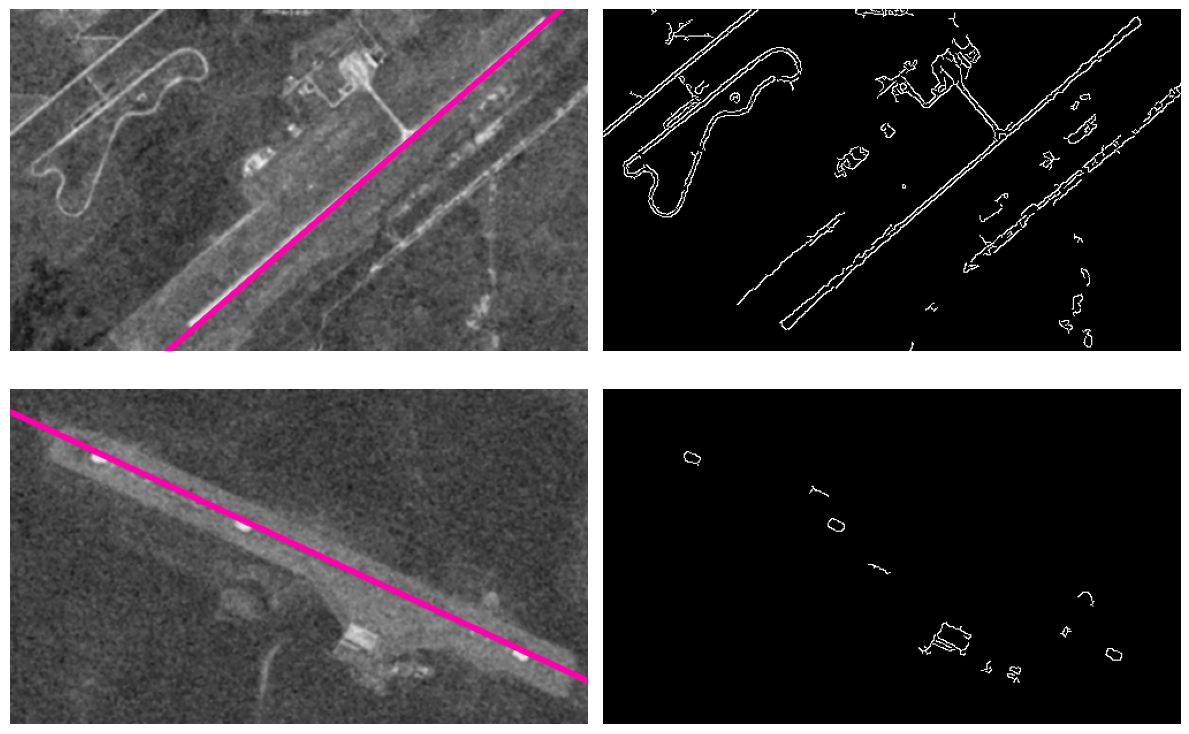

In [417]:
corrientes_rotada = (imutils.rotate(corrientes_filtrada,180))[:,10:]  # cuando uso el utils aparece un artefacto a la izquierda que se ve en el canny y lo toma como linea, así que saco los primeros pixeles de la izquierda.
iguazu_rotada = (imutils.rotate(iguazu_filtrada,180))[:,10:]
cannyCorrientes_rotada = cv.Canny(corrientes_rotada,100,255)
cannyIguazu_rotada = cv.Canny(iguazu_rotada,100,255)

# AEROPUERTO DE CORRIENTES
corrientes_final2 = corrientes_rotada.copy()

i = 2
while True: # va subiendo el acumulador hasta que solo queda una linea decidida
    linesP_corrientes = cv.HoughLines(cannyCorrientes_rotada,1,np.pi/180,i)
    if len(linesP_corrientes) != 1: # si no hay una, sumo acumulador para seguir buscando
      i+=1
    else: # si hay solo una linea, corto y grafico esa
      break

if linesP_corrientes is not None:
    for line in linesP_corrientes:
        rho, theta = line[0]
        cos_theta, sin_theta = np.cos(theta), np.sin(theta)
        x0, y0 = rho * cos_theta, rho * sin_theta
        x1, y1 = int(x0 + 1000 * (-sin_theta)), int(y0 + 1000 * cos_theta)
        x2, y2 = int(x0 - 1000 * (-sin_theta)), int(y0 - 1000 * cos_theta)
        cv.line(corrientes_final2, (x1, y1), (x2, y2), (255, 0, 172), 3, cv.LINE_AA)

# AEROPUERTO DE IGUAZU
iguazu_final2 = iguazu_rotada.copy()
i = 2
while True: # va subiendo el acumulador hasta que solo queda una linea decidida
    linesP_iguazu = cv.HoughLines(cannyIguazu_rotada,1,np.pi/180,i)
    if (len(linesP_iguazu) != 1): # si no hay una, sumo acumulador para seguir buscando
      i+=1
    else: # si hay solo una linea, corto y grafico esa
      break

if linesP_iguazu is not None:
    for line in linesP_iguazu:
        rho, theta = line[0]
        cos_theta, sin_theta = np.cos(theta), np.sin(theta)
        x0, y0 = rho * cos_theta, rho * sin_theta
        x1, y1 = int(x0 + 1000 * (-sin_theta)), int(y0 + 1000 * cos_theta)
        x2, y2 = int(x0 - 1000 * (-sin_theta)), int(y0 - 1000 * cos_theta)
        cv.line(iguazu_final2, (x1, y1), (x2, y2), (255, 0, 172), 3, cv.LINE_AA)


fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(12,8))
ax[0,0].imshow(corrientes_final2,cmap="gray")
ax[0,0].axis('off')
ax[0,1].imshow(cannyCorrientes_rotada,cmap="gray")
ax[0,1].axis('off')
ax[1,0].imshow(iguazu_final2,cmap="gray")
ax[1,0].axis('off')
ax[1,1].imshow(cannyIguazu_rotada,cmap="gray")
ax[1,1].axis('off')
plt.tight_layout()
plt.show()